In [1]:
%matplotlib inline
import torch
import numpy as np
import sys
sys.path.insert(0, '..')
from utils import plot_stroke
from utils.constants import Global
from utils.dataset import HandwritingDataset
from utils.data_utils import data_denormalization, data_processing, data_normalization

..\utils\__init__.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://matplotlib_inline.backend_inline' by the following code:
  File "C:\Users\hladi\AppData\Local\Programs\Python\Python37\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\hladi\AppData\Local\Programs\Python\Python37\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\Users\hladi\Desktop\Handwriting-synthesis3\env\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\hladi\Desktop\Handwriting-synthesis3\env\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "c:\Users\hladi\Desktop\Handwriting-synthesis3\env\lib\site-packages\i

In [3]:
data_path = '../data/'
strokes = np.load(data_path + 'strokes.npy', allow_pickle=True, encoding='bytes')
print(strokes[0])

[[ 0.    0.    0.  ]
 [ 0.    0.    0.  ]
 [ 0.    0.25  0.  ]
 ...
 [ 0.   -0.85 -1.2 ]
 [ 0.   -0.6  -1.15]
 [ 1.   -0.8  -0.8 ]]


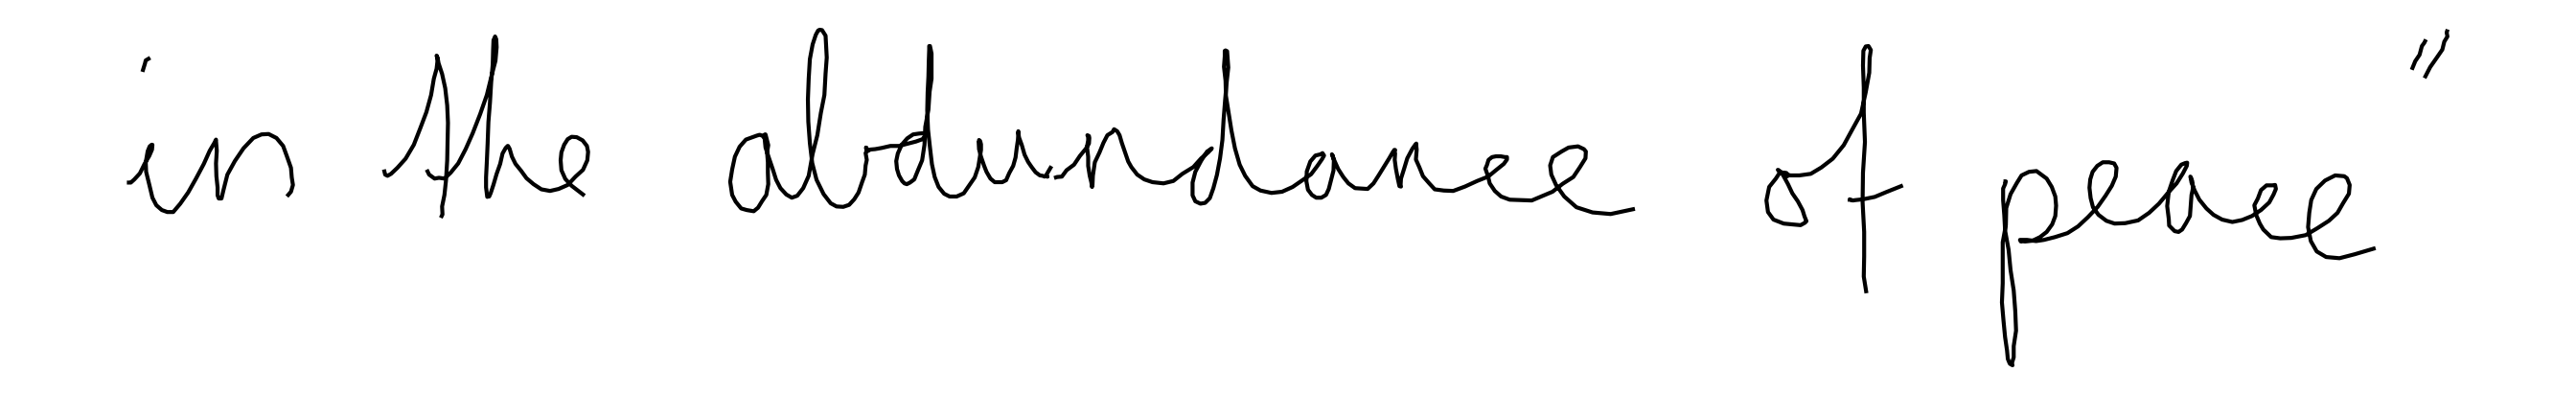

In [4]:
plot_stroke(strokes[0])

In [7]:
import os
import pickle
import random
import numpy as np
import svgwrite
from IPython.display import SVG, display


def get_bounds(data, factor):
    min_x = 0
    max_x = 0
    min_y = 0
    max_y = 0

    abs_x = 0
    abs_y = 0
    for i in range(len(data)):
        x = float(data[i, 1]) / factor
        y = float(data[i, 2]) / factor
        abs_x += x
        abs_y += y
        min_x = min(min_x, abs_x)
        min_y = min(min_y, abs_y)
        max_x = max(max_x, abs_x)
        max_y = max(max_y, abs_y)

    return (min_x, max_x, min_y, max_y)

# old version, where each path is entire stroke (smaller svg size, but
# have to keep same color)


def draw_strokes(data, factor=1, svg_filename='sample.svg'):
    min_x, max_x, min_y, max_y = get_bounds(data, factor)
    dims = (50 + max_x - min_x, 50 + max_y - min_y)

    dwg = svgwrite.Drawing(svg_filename, size=dims)
    dwg.add(dwg.rect(insert=(0, 0), size=dims, fill='white'))

    lift_pen = 1

    abs_x = 25 - min_x
    abs_y = 25 - min_y
    p = "M%s,%s " % (abs_x, abs_y)

    command = "m"

    for i in range(len(data)):
        if (lift_pen == 1):
            command = "m"
        elif (command != "l"):
            command = "l"
        else:
            command = ""
        x = float(data[i, 1]) / factor
        y = float(-data[i, 2]) / factor
        lift_pen = data[i, 0]
        p += command + str(x) + "," + str(y) + " "

    the_color = "blue"
    stroke_width = 1

    dwg.add(dwg.path(p).stroke(the_color, stroke_width).fill("none"))

    dwg.save()
    display(SVG(dwg.tostring()))

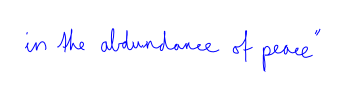

In [8]:
draw_strokes(strokes[0])